# Pratique de geopandas: données vélib

``` python
import sys
sys.path.insert(1, '../../../../') #insert the utils module
from utils import print_badges

#print_badges(__file__)
print_badges("content/course/manipulation/03_geopandas_TP.qmd")
```

<p class="badges">

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/03_geopandas_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
<a href="https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/03_geopandas_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter" alt="Download"></a>
<a href="https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/03_geopandas_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter" alt="nbviewer"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABmanipulation%2003_geopandas_TP%C2%BB&security.allowlist.enabled=false" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&amp;color=yellow?logo=Python" alt="Onyxia"></a><br>
<a href="https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath={binder_path}" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=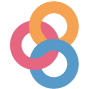" alt="Binder"></a>
<a href="http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/03_geopandas_TP.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
<a href="https://github.dev/linogaliana/python-datascientist/notebooks/course/manipulation/03_geopandas_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=visualstudiocode&label=&message=Open%20in%20Visual%20Studio%20Code&labelColor=2c2c32&color=007acc&logoColor=007acc" alt="githubdev"></a>

</p>

</p>

Installations préalables :

In [2]:
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas
!pip install pygeos

In [3]:
import geopandas as gpd

/miniconda/envs/python-ENSAE/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning:

The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.


# Lire et enrichir des données spatiales

Dans cette partie, nous utiliserons la fonction suivante,
le package [`cartiflette`](https://github.com/InseeFrLab/cartiflette.git)
qui facilite la récupération de contours de cartes.
Une version antérieure de cet exercice, présentée sous forme
d’exercice supplémentaire, utilisait des fonds de carte issus
de `data.gouv`.

In [4]:
# 0) Chargement des packages utilisés dans la partie tutoriel
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import cartiflette.s3

<div class="alert alert-success" role="alert">

1.  S’inspirer des exemples de code présents dans le chapitre précédent, mobilisant
    le package `cartiflette`
    pour télécharger les données communales.
    Vous pouvez nommer l’objet `communes_borders`
2.  Regarder les premières lignes des données. Identifier la différence avec
    un DataFrame standard.
3.  Afficher l’attribut `crs` de `communes_borders`. Ce dernier contrôle la
    transformation de l’espace tridimensionnel terrestre en une surface plane.
4.  Afficher les communes des Hauts de Seine (département 92) et utiliser la méthode
    `plot`
5.  Réprésenter la carte de Paris : quel est le problème ?

</div>

In [5]:
communes_borders = cartiflette.s3.download_vectorfile_url_all(
    values = ["75", "92", "93", "94"],
    level="COMMUNE",
    vectorfile_format="geojson",
    decoupage="departement",
    year=2022)

In [6]:
# 2) Regarder les premières lignes
communes_borders.head()
# Il y a une colonne geometry qui contient les informations nécessaires pour connaître les contours communaux

,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,geometry
0,COMMUNE_0000000009736048,Paris,PARIS,75056,Capitale d'état,2165423,NR,1,75,11,200054781,"POLYGON ((653313.800 6857558.100, 653249.300 6..."
0,COMMUNE_0000000009736037,Levallois-Perret,LEVALLOIS-PERRET,92044,Commune simple,66082,16,2,92,11,200054781/200057982,"POLYGON ((647761.400 6867306.900, 647839.200 6..."
1,COMMUNE_0000000009736055,Bois-Colombes,BOIS-COLOMBES,92009,Commune simple,28841,11,2,92,11,200054781/200057990,"POLYGON ((646224.700 6867615.800, 646229.000 6..."
2,COMMUNE_0000000009736538,Malakoff,MALAKOFF,92046,Commune simple,30950,18,1,92,11,200054781/200057966,"POLYGON ((646995.300 6857373.400, 647177.500 6..."
3,COMMUNE_0000000009736038,Clichy,CLICHY,92024,Commune simple,63089,09,2,92,11,200054781/200057990,"POLYGON ((648952.800 6866241.200, 648865.900 6..."


In [7]:
# 3) Afficher le crs
communes_borders.crs
# Les données ne sont pas projetées, elles sont en "longitude - latitude" (WGS 84)

<Derived Projected CRS: EPSG:2154>
Name: RGF93 v1 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica.
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

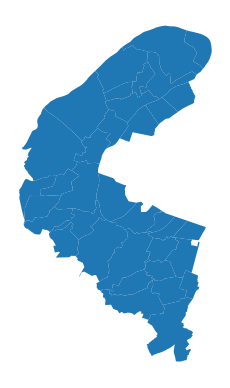

In [8]:
# 4) afficher les communes du département 12
ax = communes_borders[communes_borders['INSEE_DEP'] == "92"].plot()
ax.set_axis_off()

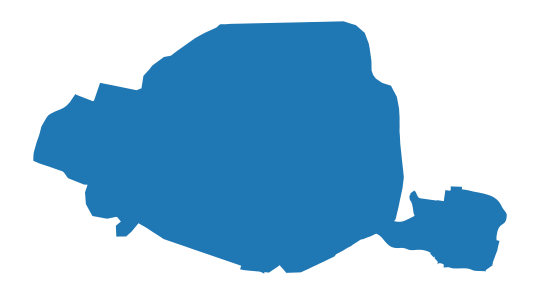

In [9]:
# 5) Représenter la carte de Paris. Quel est le problème ?
ax = communes_borders[communes_borders['INSEE_DEP'] == "75"].plot()
ax.set_axis_off()

En effet, on ne dispose ainsi pas des limites des arrondissements parisiens, ce
qui appauvrit grandement la carte de Paris.
On pourrait les récupérer directement
depuis le site d’*open-data* du Grand Paris, ce qui est proposé en exercice supplémentaire.
On propose ici d’utiliser à nouveau
`cartiflette` pour cela afin de disposer du fonds de carte officiel.

<div class="alert alert-success" role="alert">

1.  Importer les données de découpage des arrondissements parisiens à l’adresse
    <https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr>
2.  Vérifier sur une carte que les découpages des arrondissements sont bien présents.
3.  Vérifier l’attribut `crs`. Est-il cohérent avec celui des données communales ?
4.  Retirer Paris du jeu de données communales et utiliser les arrondissements
    pour enrichir (nommer l’objet obtenu `data_borders`).
5.  Représenter à nouveau les communes de la petite couronne parisienne (75, 92, 93, 94)

</div>

In [10]:
#1) Importer arrondissements
arrondissements = cartiflette.s3.download_vectorfile_url_all(
    values = "75",
    level="ARRONDISSEMENT_MUNICIPAL",
    vectorfile_format="geojson",
    decoupage="departement",
    year=2022)

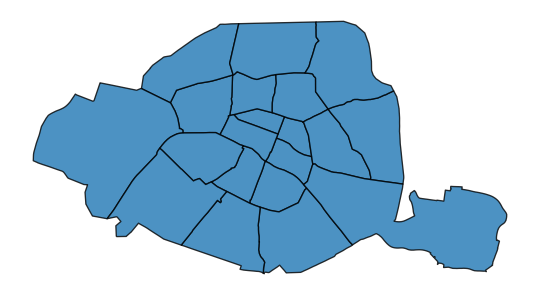

In [11]:
#2) Vérifier présence arrondissements
ax = arrondissements.plot(alpha = 0.8, edgecolor = "k")
ax.set_axis_off()

In [12]:
#3) Vérifier l'attribut `crs`. Est-il cohérent ?
print(communes_borders.crs)
print(communes_borders.crs == arrondissements.crs)
# Oui, les deux fonds de carte ont le même attribut CRS, pas besoin de convertir les projections de l'une d'entre elles

epsg:2154
True

In [13]:
#4) Retirer Paris et ajouter les arrondissements
import pandas as pd

data_paris = pd.concat(
  [
    communes_borders[communes_borders['INSEE_DEP'] != "75"],
    arrondissements
  ])

La carte obtenue à l’issue de la question 6, c’est-à-dire après
avoir consolidé les données, devrait avoir l’aspect suivant:

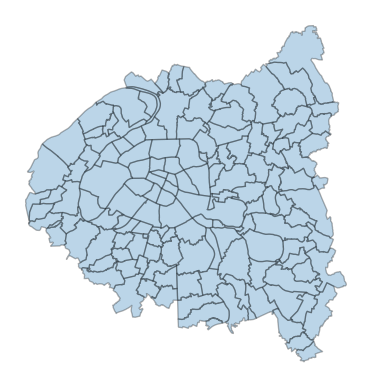

In [14]:
#6) Représenter les communes du 75, 92, 93, 94
ax = data_paris.plot(alpha = 0.3, edgecolor = "k")
ax.set_axis_off()

# Utiliser des données géographiques comme des couches graphiques

Souvent, le découpage communal ne sert qu’en fond de cartes, pour donner des
repères. En complément de celui-ci, on peut désirer exploiter
un autre jeu de données.

On va partir des données de localisation des
stations velib,
disponibles [sur le site d’open data de la ville de Paris](https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/table/) et
requêtables directement par l’url
<https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr>

<div class="alert alert-success" role="alert">

1.  Importer les données velib sous le nom `station`
2.  Vérifier la projection géographique de `station` (attribut `crs`). Si celle-ci est différente des données communales, reprojeter ces
    dernières dans le même système de projection que les stations de vélib
3.  Représenter sur une carte les 50 stations les plus importantes (variable `capacity`). Vous pouvez également afficher le fonds de carte des arrondissements de Paris.
    Cette [page](https://geopandas.org/mapping.html#maps-with-layers) peut vous aider pour comprendre comment afficher plusieurs couches à la fois. Vous pouvez customiser la carte en retirant les axes grâce à la méthode `set_axis_off` et mettre un titre tel que *“Les 50 principales stations de Vélib”* avec la méthode `set_title`.
4.  Afficher également (trait bleu et épais) les réseaux de transport en communs, disponibles [ici](https://data.iledefrance-mobilites.fr/explore/dataset/traces-du-reseau-ferre-idf/map/?location=7,48.69717,2.33167&basemap=jawg.streets). L’url à requêter est
    <https://data.iledefrance-mobilites.fr/explore/dataset/traces-du-reseau-ferre-idf/download/?format=geojson&timezone=Europe/Berlin&lang=fr>

</div>

In [15]:
# 1) Importer les données velib
url = "https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
stations = gpd.read_file(url)
stations.head()

,capacity,name,stationcode,geometry
0,42,Porte de Saint-Ouen - Bessières,17044,POINT (2.32851 48.89792)
1,44,Ramponeau - Belleville,20143,POINT (2.37906 48.87103)
2,30,Saint-Cloud - Hippodrome,16138,POINT (2.25491 48.85772)
3,21,Marceau - Chaillot,8048,POINT (2.29900 48.86883)
4,23,Porte Pouchet-Bessières,17008,POINT (2.32306 48.89788)


In [16]:
# 2) Reprojection
stations.crs
data_paris = data_paris.to_crs(stations.crs)

La carte attendu à l’issue de la question 3 a l’aspect suivant:

Text(0.5, 1.0, 'Les 50 principales stations de Vélib')

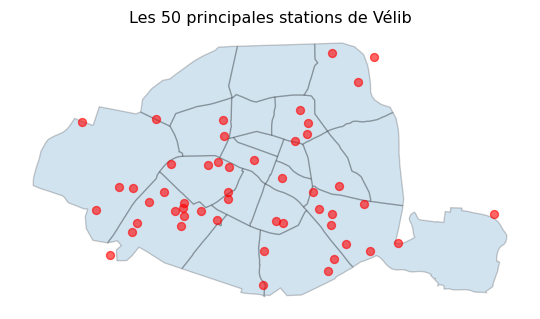

In [17]:
# 3) Carte des 50 stations les plus importantes. 
base = data_paris[data_paris['INSEE_DEP'] == '75'].plot(alpha = 0.2, edgecolor = 'black')
stations.sort_values('capacity', ascending = False).head(50).plot(ax = base, color = 'red', alpha = 0.6)
base.set_axis_off()
base.set_title("Les 50 principales stations de Vélib")

L’ajout du réseau de métro permet d’obtenir une carte ressemblant à celle-ci

['TRAMWAY' 'RER' 'TRAIN' 'TER' 'METRO' 'NAVETTE' 'RER C']

Text(0.5, 1.0, 'Les 50 principales stations de Vélib')

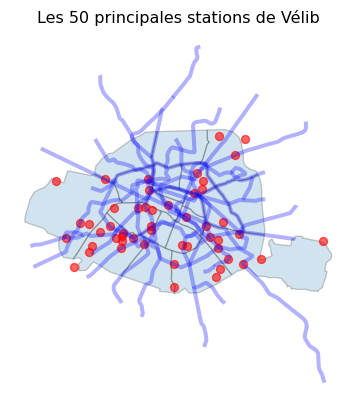

In [18]:
# 4) Réseaux de transport en communs
url = "https://data.iledefrance-mobilites.fr/explore/dataset/traces-du-reseau-ferre-idf/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
transports = gpd.read_file(url)
transports.head()
print(transports['mode'].unique())
base = data_paris[data_paris['INSEE_DEP'] == '75'].plot(alpha = 0.2, edgecolor = 'black')
stations.sort_values('capacity', ascending = False).head(50).plot(ax = base, color = 'red', alpha = 0.6)
transports[transports['mode'] == "METRO"].plot(ax=base, color = 'blue', alpha = 0.3,linewidth=3)
base.set_axis_off()
base.set_title("Les 50 principales stations de Vélib")

Pour faire une belle carte, il faudrait couper les lignes de métro via une jointure spatiale ou
utiliser un fonds de carte conceptuel.
L’exercice suivant propose de mettre en oeuvre la deuxième méthode. La première
est proposée en exercice supplémentaire.

<div class="alert alert-success" role="alert">

1.  Recréer par couche successive la carte précédente, que vous pouvez nommer `base`
2.  Utiliser `add_basemap` du package [`contextily`](https://contextily.readthedocs.io/en/latest/)
    pour ajouter, en arrière plan, un fonds de carte
3.  Jouer avec les fonds disponibles en utilisant l’argument `source`

</div>

Par exemple, en utilisant le fond `Stamen.Watercolor`, on obtient la carte
suivante. Celle-ci permet déjà de mieux localiser les stations.

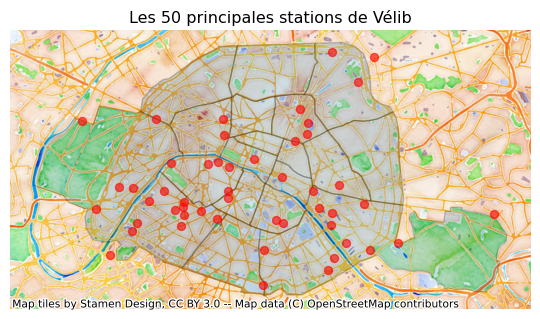

In [19]:
base = data_paris[data_paris['INSEE_DEP'] == '75'].to_crs(3857).plot(alpha = 0.2, edgecolor = 'black')
stations.sort_values('capacity', ascending = False).head(50).to_crs(3857).plot(ax = base, color = 'red', alpha = 0.6)
base.set_axis_off()
base.set_title("Les 50 principales stations de Vélib")
ctx.add_basemap(base, source=ctx.providers.Stamen.Watercolor)

# Jointures spatiales

Les jointures attributaires fonctionnent comme avec un DataFrame `pandas`.
Pour conserver un objet spatial *in fine*, il faut faire attention à utiliser en premier (base de gauche) l’objet `GeoPandas`.
En revanche, l’un des intérêts des objets geopandas est qu’on peut également faire une jointure sur la dimension spatiale grâce à `sjoin`.

La documentation à laquelle se référer est [ici](https://geopandas.org/mergingdata.html#spatial-joins).

<div class="alert alert-success" role="alert">

1.  Faire une jointure spatiale pour enrichir les données de stations en y ajoutant des informations de `data_paris`. Appeler cet objet `stations_info`
2.  Représenter la carte des stations du 19e arrondissement (s’aider de la variable `c_ar`). Vous pouvez mettre en fond de carte les arrondissements parisiens.
3.  Compter le nombre de stations velib et le nombre de places velib par arrondissement ou commune (pour vous aider, vous pouvez compléter vos connaissances avec [ce tutoriel](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)). Représenter sur une carte chacune des informations
4.  Représenter les mêmes informations mais en densité (diviser par la surface de l’arrondissement ou commune en km2)
5.  (optionnel) Choisir une des cartes de densité et la nettoyer (retirer les axes, mettre les titres…)

</div>

In [20]:
#1.  Jointure spatiale entre stations et data_paris
stations_info = gpd.sjoin(stations, data_paris, op = 'within')
stations_info.head()

/miniconda/envs/python-ENSAE/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3318: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.


,capacity,name,stationcode,geometry,index_right,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,INSEE_ARM
0,42,Porte de Saint-Ouen - Bessières,17044,POINT (2.32851 48.89792),11,ARR_MUNI0000000009736041,Paris 17e Arrondissement,PARIS 17E ARRONDISSEMENT,75056,NaN,166543,NaN,NaN,75,NaN,NaN,75117
4,23,Porte Pouchet-Bessières,17008,POINT (2.32306 48.89788),11,ARR_MUNI0000000009736041,Paris 17e Arrondissement,PARIS 17E ARRONDISSEMENT,75056,NaN,166543,NaN,NaN,75,NaN,NaN,75117
18,46,Place du Maréchal Juin - Péreire,17027,POINT (2.29829 48.88526),11,ARR_MUNI0000000009736041,Paris 17e Arrondissement,PARIS 17E ARRONDISSEMENT,75056,NaN,166543,NaN,NaN,75,NaN,NaN,75117
27,53,Guy Môquet - Saint-Ouen,17001,POINT (2.32703 48.89278),11,ARR_MUNI0000000009736041,Paris 17e Arrondissement,PARIS 17E ARRONDISSEMENT,75056,NaN,166543,NaN,NaN,75,NaN,NaN,75117
32,30,Carnot - Général Lanrezac,17033,POINT (2.29382 48.87544),11,ARR_MUNI0000000009736041,Paris 17e Arrondissement,PARIS 17E ARRONDISSEMENT,75056,NaN,166543,NaN,NaN,75,NaN,NaN,75117


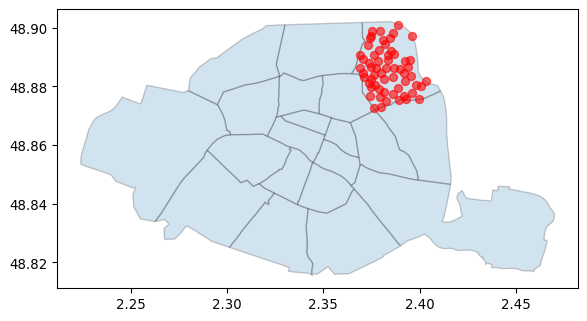

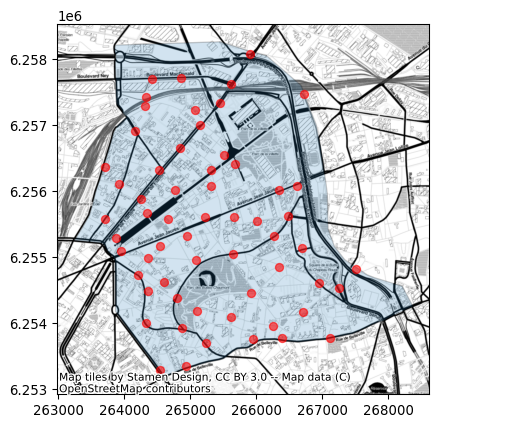

In [21]:
#2. Carte des stations du 19e arrondissement
# Méthode 1 : En affichant tout Paris
base = data_paris[data_paris['INSEE_DEP'] == "75"].plot(alpha = 0.2, edgecolor = 'k') #fond de carte des arrondissements
stations_19 = stations_info.loc[stations_info['NOM'].str.contains("19e")]
stations_19.plot(ax = base, color = 'red', alpha = 0.6) # stations du 19e
# Méthode 2 : En affichant seulement le 19e
base = data_paris[data_paris['NOM'].str.contains("19e")].to_crs(3857).plot(alpha = 0.2, edgecolor = 'k') #fond de carte du 19e
stations_info[stations_info['NOM'].str.contains("19e")].to_crs(3857).plot(ax = base, color = 'red', alpha = 0.6) #stations du 19e
ctx.add_basemap(base, source=ctx.providers.Stamen.Toner)

<AxesSubplot: >

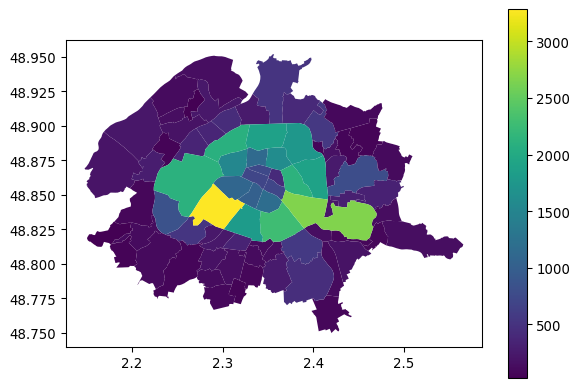

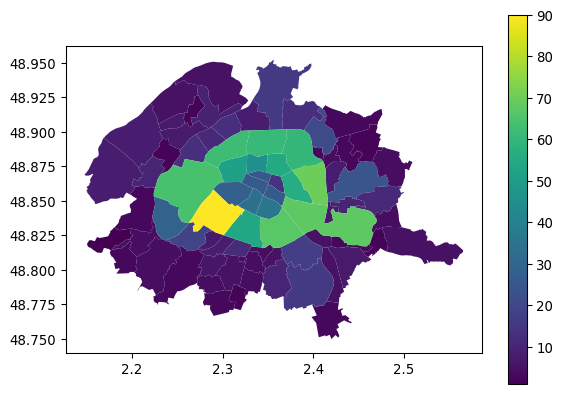

In [22]:
#3. Nombre de stations et de places vélib par arrondissement
stations_agg = stations_info.groupby('NOM').agg({'stationcode': 'nunique',
                                   'capacity': 'sum'}).reset_index()
stations_agg.head()
df = data_paris.merge(stations_agg, how = 'inner')
df.head()
df.plot(column = 'capacity', legend=True)
df.plot(column = 'stationcode', legend=True)

<AxesSubplot: >

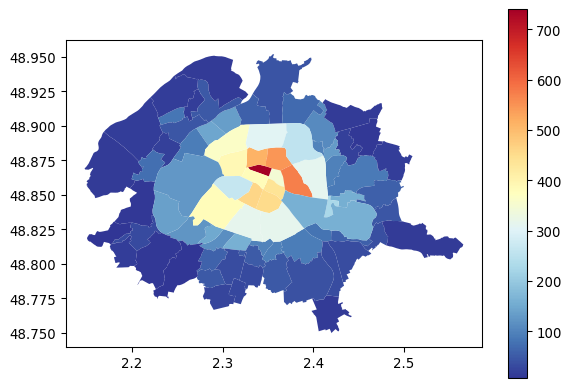

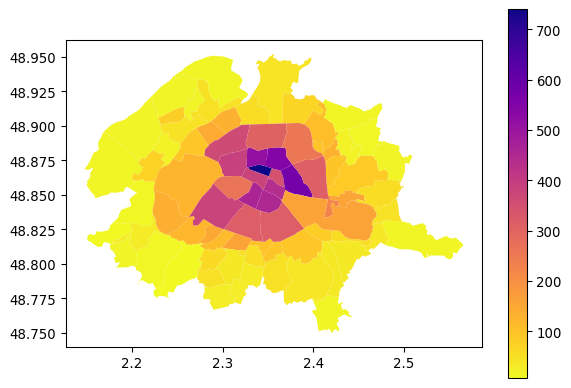

In [23]:
#4. En densité
cols = ['stationcode','capacity']
df[[s + '_density' for s in cols]] = df[cols].div(df.to_crs(2158).area*10**(-6), axis = 0)
df.plot(column = 'capacity_density', cmap = 'RdYlBu_r', legend=True)
df.plot(column = 'capacity_density', cmap = 'plasma_r', legend=True)

Text(0.5, 1.0, "Densité des stations vélib dans l'agglomération parisienne")

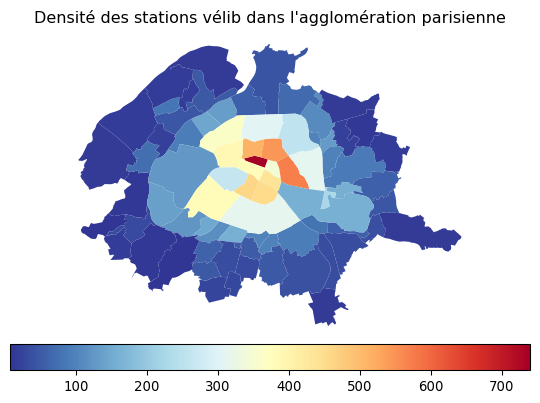

In [24]:
ax = df.plot(column = 'capacity_density', cmap = 'RdYlBu_r', legend=True, legend_kwds={"orientation": "horizontal", "pad": 0.01}) 
ax.set_axis_off()
ax.set_title("Densité des stations vélib dans l'agglomération parisienne")

In [25]:
fig = ax.get_figure()
fig.savefig("featured.png")

# Trouver les toilettes publiques les plus proches

Une aide [ici](https://pysal.org/scipy2019-intermediate-gds/deterministic/gds1-relations.html#how-about-nearest-neighbor-joins)

Cet exemple peut également vous aider à comprendre certains concepts :

In [26]:
from shapely.ops import Polygon
from shapely.ops import nearest_points
triangle = Polygon([(0, 0), (1, 0), (0.5, 1), (0, 0)])
square = Polygon([(0, 2), (1, 2), (1, 3), (0, 3), (0, 2)])
[o.wkt for o in nearest_points(triangle, square)]

['POINT (0.5 1)', 'POINT (0.5 2)']

<div class="alert alert-success" role="alert">

1.  Charger la localisation des toilettes publiques présente ici : https://data.ratp.fr/explore/dataset/sanitaires-reseau-ratp/download/?format=geojson&timezone=Europe/Berlin&lang=fr. Appelez-la `toilettes_publiques`.
2.  Convertir les objets `toilettes_publiques` et `stations` au CRS 2154
3.  Utiliser la jointure spatiale par plus proche distance `sjoin_nearest` pour associer à chaque station les toilettes publiques les plus proches
4.  Trouver les toilettes publiques les plus proches de la station de vélib “Edgard Quinet - Gaité”.
5.  Représenter un histogramme des distances aux toilettes les plus proches

</div>

In [27]:
# 1. Charger les localisations des toilettes
toilettes_publiques = gpd.read_file("https://data.ratp.fr/explore/dataset/sanitaires-reseau-ratp/download/?format=geojson&timezone=Europe/Berlin&lang=fr")
toilettes_publiques.head()

,accessible_au_public,acces_bouton_poussoir,tarif_gratuit_payant,gestionnaire,accessibilite_pmr,acces_passe_navigo_ou_ticket_t,ligne,localisation,en_zone_controlee,station,hors_zone_controlee_station,hors_zone_controlee_voie_publique,geometry
0,oui,oui,gratuit,Toilette publique RATP,oui,None,13,A proximité du point de vente - information.,None,Les Agnettes,oui,None,POINT (2.28606 48.92318)
1,oui,oui,gratuit,Toilette publique RATP,oui,None,14,Dans le couloir en direction des quais ligne 6...,oui,Bercy,None,None,POINT (2.37948 48.84019)
2,oui,oui,gratuit,Toilette publique RATP,oui,None,14,En direction de la sortie 13.,None,Gare de Lyon,oui,None,POINT (2.37289 48.84392)
3,oui,oui,gratuit,Toilette publique RATP,oui,None,14,A proximité du point de vente - information.,None,Olympiades,oui,None,POINT (2.36620 48.82691)
4,oui,oui,gratuit,Toilette publique RATP,oui,None,A,A proximité du point de vente - information.,oui,Auber,None,None,POINT (2.32953 48.87315)


In [28]:
toilettes_publiques = toilettes_publiques.to_crs(2154)
stations = stations.to_crs(2154)

In [29]:
# 3. Jointure spatiale
stations_toilettes = stations.sjoin_nearest(
  toilettes_publiques,
  how='inner',
  distance_col="distance")

# 4. Trouver la station de toilettes la plus proche de la station de vélib "Edgard Quinet - Gaité"
stations_toilettes.loc[stations_toilettes['name'].str.contains("Edgar Quinet")]
# Il va falloir se retenir un peu car s'agit de toilettes situées à la station Denfert Rochereau !

,capacity,name,stationcode,geometry,index_right,accessible_au_public,acces_bouton_poussoir,tarif_gratuit_payant,gestionnaire,accessibilite_pmr,acces_passe_navigo_ou_ticket_t,ligne,localisation,en_zone_controlee,station,hors_zone_controlee_station,hors_zone_controlee_voie_publique,distance
579,46,Edgar Quinet - Raspail,14002,POINT (650803.023 6860136.855),40,oui,oui,gratuit,Toilette publique RATP,non,None,B,"Sur le quai ligne B, en direction de Saint-Rém...",oui,Denfert-Rochereau,None,None,737.660246
587,27,Edgar Quinet - Gaité,14001,POINT (650428.961 6860335.557),40,oui,oui,gratuit,Toilette publique RATP,non,None,B,"Sur le quai ligne B, en direction de Saint-Rém...",oui,Denfert-Rochereau,None,None,1091.971078
829,33,Gare Montparnasse - Edgar Quinet,14101,POINT (650335.900 6860372.707),40,oui,oui,gratuit,Toilette publique RATP,non,None,B,"Sur le quai ligne B, en direction de Saint-Rém...",oui,Denfert-Rochereau,None,None,1177.501002


<AxesSubplot: ylabel='Frequency'>

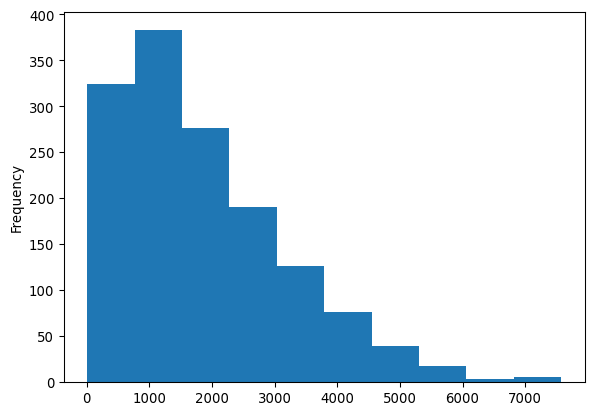

In [30]:
stations_toilettes['distance'].plot(kind = "hist")

# Exercices supplémentaires

Voici une fonction pour télécharger et dézipper
facilement un fonds de carte issu de `data.gouv`

In [31]:
import requests
import tempfile
import zipfile

temporary_location = tempfile.gettempdir()

def download_unzip(url, dirname = tempfile.gettempdir(), destname = "borders"):
  myfile = requests.get(url)
  open("{}/{}.zip".format(dirname, destname), 'wb').write(myfile.content)
  with zipfile.ZipFile("{}/{}.zip".format(dirname, destname), 'r') as zip_ref:
      zip_ref.extractall(dirname + '/' + destname)

Importer le fichier avec le package `GeoPandas`
(si vous avez laissé les paramètres par défaut,
le fichier devrait
être à l’emplacement `temporary_location + "/borders/communes-20210101.shp"`).

In [32]:
# 1) télécharger les données communales
url = "https://www.data.gouv.fr/fr/datasets/r/0e117c06-248f-45e5-8945-0e79d9136165"
download_unzip(url)

In [33]:
# 2) Importer le fichier
#communes_borders = gpd.read_file(temporary_location + "/borders/communes-20220101.shp")

1.  Importer les données de découpage des arrondissements parisiens à l’adresse
    <https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr>
2.  Vérifier sur une carte que les découpages des arrondissements sont bien présents.
3.  Vérifier l’attribut `crs`. Est-il cohérent avec celui des données communales ?
4.  Retirer Paris du jeu de données communales et utiliser les arrondissements
    pour enrichir (nommer l’objet obtenu `data_borders`). Ici, on peut ne pas se
    soucier de la variable commune de superficie aux niveaux différents car on
    va la recréer. En revanche, renommer la variable `c_arinsee` en `insee` avec
    la méthode `rename` et faire attention aux types des variables

In [34]:
#1) Importer arrondissements
arrondissements = gpd.read_file("https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr")

<AxesSubplot: >

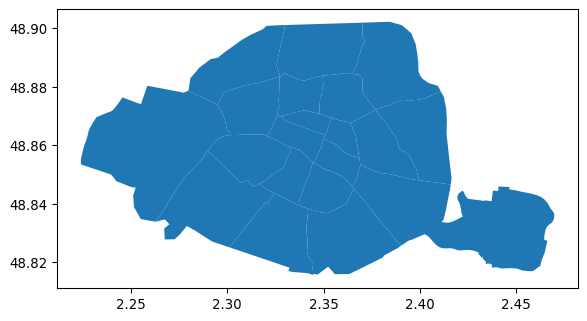

In [35]:
#2) Vérifier présence arrondissements
arrondissements.plot()

In [36]:
#3) Vérifier l'attribut `crs`. Est-il cohérent ?
print(communes_borders.crs)
print(communes_borders.crs == arrondissements.crs)
# Oui, les deux fonds de carte ont le même attribut CRS, pas besoin de convertir les projections de l'une d'entre elles

epsg:2154
False

In [37]:
#4) Retirer Paris et ajouter les arrondissements
## On fait en sorte que les colonnes de arrondissements soient les mêmes que celles de communes borders
arrondissements = arrondissements.rename(columns = {"c_arinsee": "INSEE_DEP"})
arrondissements['INSEE_DEP'] = "75"
# On sélectionne enlève la ligne du contour de Paris initiale, et on ajoute à la place les lignes d'arrondissements
data_paris = communes_borders[communes_borders["INSEE_DEP"] != "75"].append(arrondissements)
data_paris.tail()

/tmp/ipykernel_383/3009867045.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,geometry,c_ar,l_aroff,surface,l_ar,n_sq_co,n_sq_ar,perimetre
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,NaN,NaN,"POLYGON ((2.345 48.854, 2.344 48.854, 2.344 48...",6.0,Luxembourg,2.153096e+06,6ème Ardt,750001537.0,750000006.0,6483.686786
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,NaN,NaN,"POLYGON ((2.414 48.834, 2.414 48.834, 2.414 48...",12.0,Reuilly,1.631478e+07,12ème Ardt,750001537.0,750000012.0,24089.666298
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,NaN,NaN,"POLYGON ((2.366 48.886, 2.365 48.884, 2.365 48...",18.0,Buttes-Montmartre,5.996051e+06,18ème Ardt,750001537.0,750000018.0,9916.464176
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,NaN,NaN,"POLYGON ((2.389 48.901, 2.390 48.901, 2.391 48...",19.0,Buttes-Chaumont,6.792651e+06,19ème Ardt,750001537.0,750000019.0,11253.182479
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,NaN,NaN,"POLYGON ((2.364 48.846, 2.365 48.846, 2.366 48...",5.0,Panthéon,2.539375e+06,5ème Ardt,750001537.0,750000005.0,6239.195396


## Jointures spatiales

L’objectif de cet exercice est de ne conserver que les
lignes de transports à l’intérieur de Paris intra-muros.
Il s’agit d’appliquer les jointures spatiales de manière
un petit peu différente à précédemment

<div class="alert alert-success" role="alert">

1.  Utiliser l’URL <https://data.iledefrance-mobilites.fr/explore/dataset/traces-du-reseau-ferre-idf/download/?format=geojson&timezone=Europe/Berlin&lang=fr> pour récupérer les lignes de transport
    de la RATP. L’appeler `transports`.
2.  A partir des arrondissements parisiens, utiliser `unary_union` pour créer un unique polygone parisien. Utiliser `within` pour ne conserver que les points de `transports` qui se trouvent
    dans Paris intra-muros
3.  Représenter graphiquement

</div>

In [38]:
url = "https://data.iledefrance-mobilites.fr/explore/dataset/traces-du-reseau-ferre-idf/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
transports = gpd.read_file(url)

In [39]:
#2)
paris = data_paris.loc[data_paris['INSEE_DEP']=="75"].geometry.unary_union
transports_paris = transports[transports.geometry.within(paris)]

La carte obtenue aura l’aspect suivant:

<AxesSubplot: >

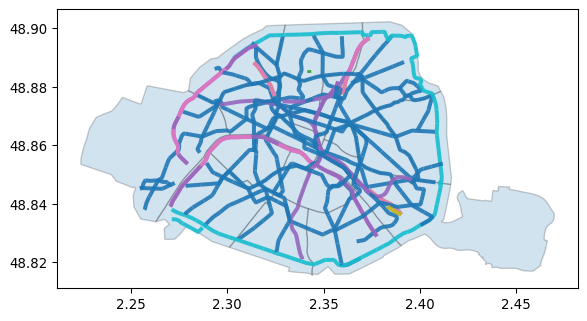

In [40]:
base = data_paris[data_paris['INSEE_DEP'] == '75'].plot(alpha = 0.2, edgecolor = 'black')
transports_paris.plot(ax=base, column='mode', alpha = 0.9, linewidth=3)